## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [1]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [4]:
HOME='/content'
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 89.3MB/s]

2023-10-04 21:28:07.634059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 21:28:09.951243: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 139MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 69.8ms
Speed: 0.6ms pre-process, 69.8ms inference, 327.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


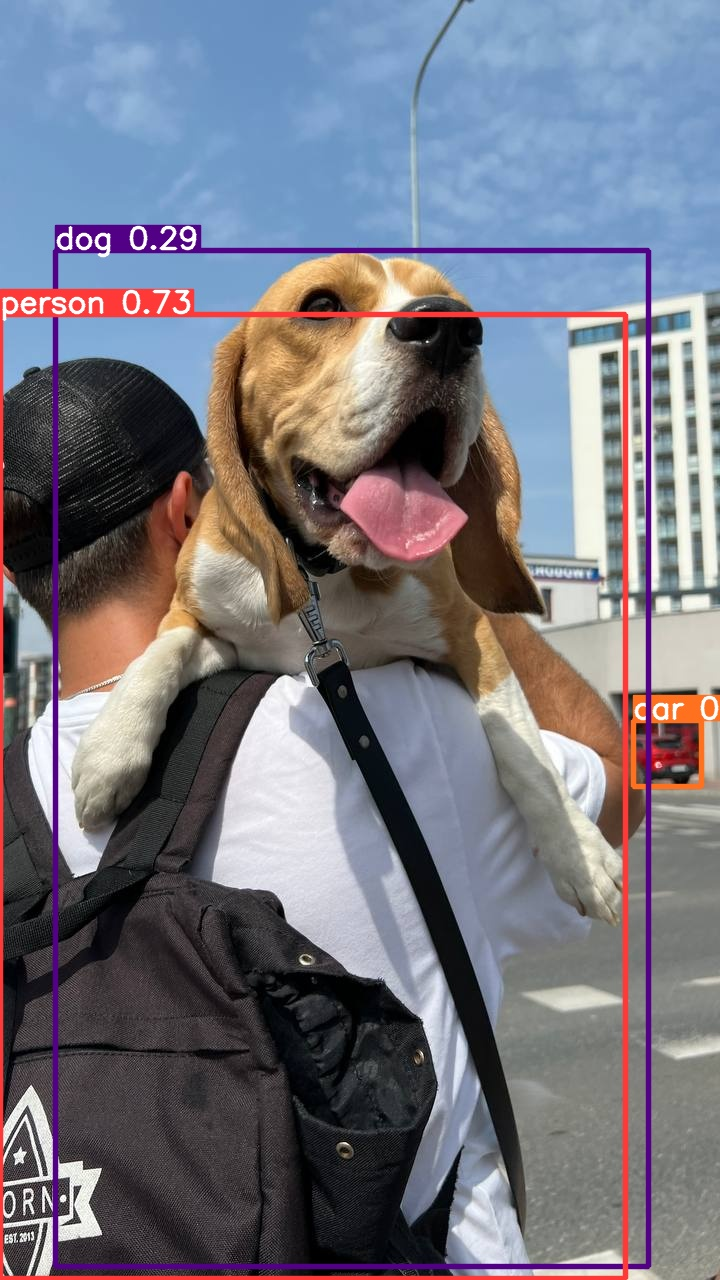

In [5]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import transforms
from PIL import Image

# Load your YOLO model
model = YOLO(f'{HOME}/yolov8n.pt')

# Define a function to process and modify the image
def process_image(image_path):
    # Load the image from the local file path
    frame = cv2.imread(image_path)

    # Initialize the modified_frame with the unmodified image
    modified_frame = frame.copy()

    # Make predictions with the YOLO model directly on the image path
    with torch.no_grad():
        results = model(source=frame, conf=0.25)

    # Get the class predictions
    class_predictions = results[0].boxes.cls.cpu().numpy()
    print(class_predictions)
    # Create a mask to set the pixels inside the bounding box to red
    mask = np.zeros_like(frame)

    # Loop through all detected classes
    for i, class_id in enumerate(class_predictions):
        # Get bounding box coordinates for the detected object
       class_predictions = results[0].boxes.cls.cpu().numpy()


        mask[bbox[1]:bbox[3], bbox[0]:bbox[2]] = [255, 255, 255]

        # Apply the mask to the modified_frame
    modified_frame = np.where(mask != [255, 255,255], modified_frame, [0, 0, 250])

    return modified_frame


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


[          0          16           2]


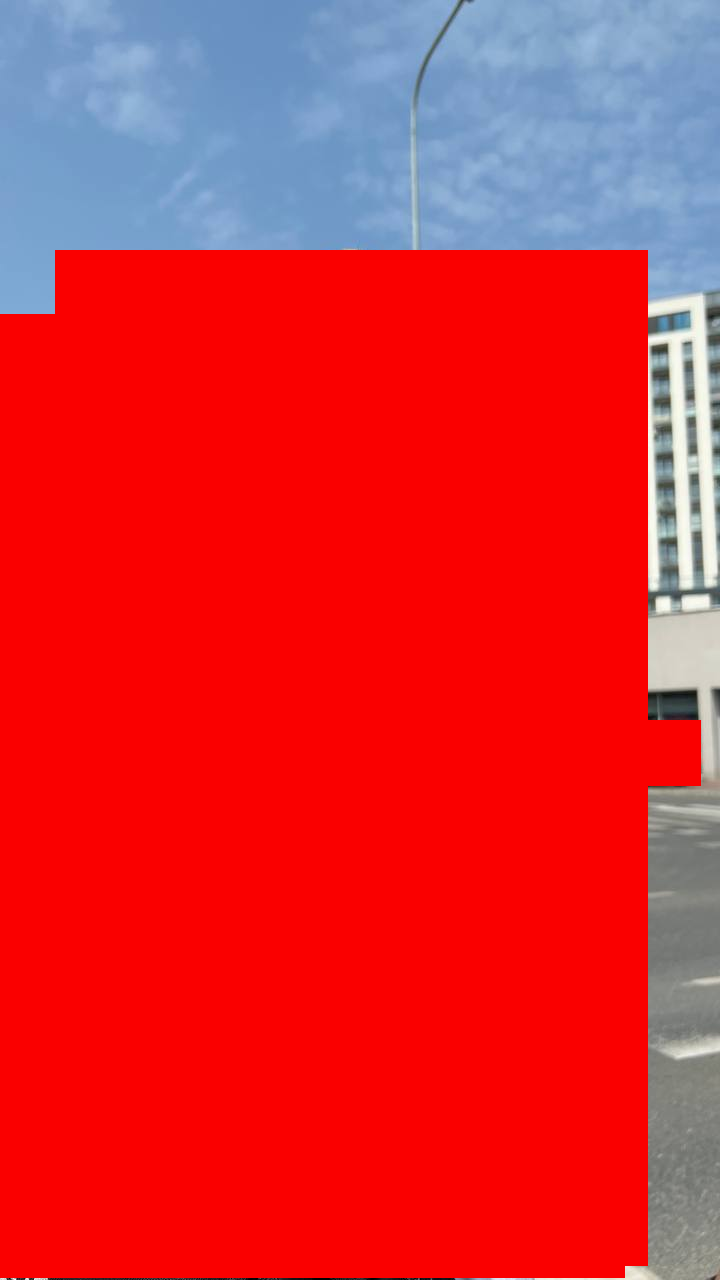

In [ ]:
from google.colab.patches import cv2_imshow
# Local file path of the input image
image_path = '/content/dog.jpeg'

# Process the image from the file path
modified_image = process_image(image_path)

# Display the modified image
# Display the modified image
cv2_imshow(modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

# Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!mkdir datasets

In [7]:
!cd datasets

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BXRbaNxc30Qj54DB0D0O")
project = rf.workspace("dataset-5cq1l").project("person-reidentification-bhlic")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to person-reidentification-1 in yolov8:: 100%|██████████| 1141/1141 [00:00<00:00, 6713.71it/s]


## Custom Training

In [9]:
%cd {HOME}
location='/content/datasets/person-reidentification-1'
!yolo task=detect mode=train model=yolov8s.pt data={location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 295MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/person-reidentification-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1400.jpg
events.out.tfevents.1696455153.9e48ab877023.1762.0  train_batch1401.jpg
F1_curve.png					    train_batch1402.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


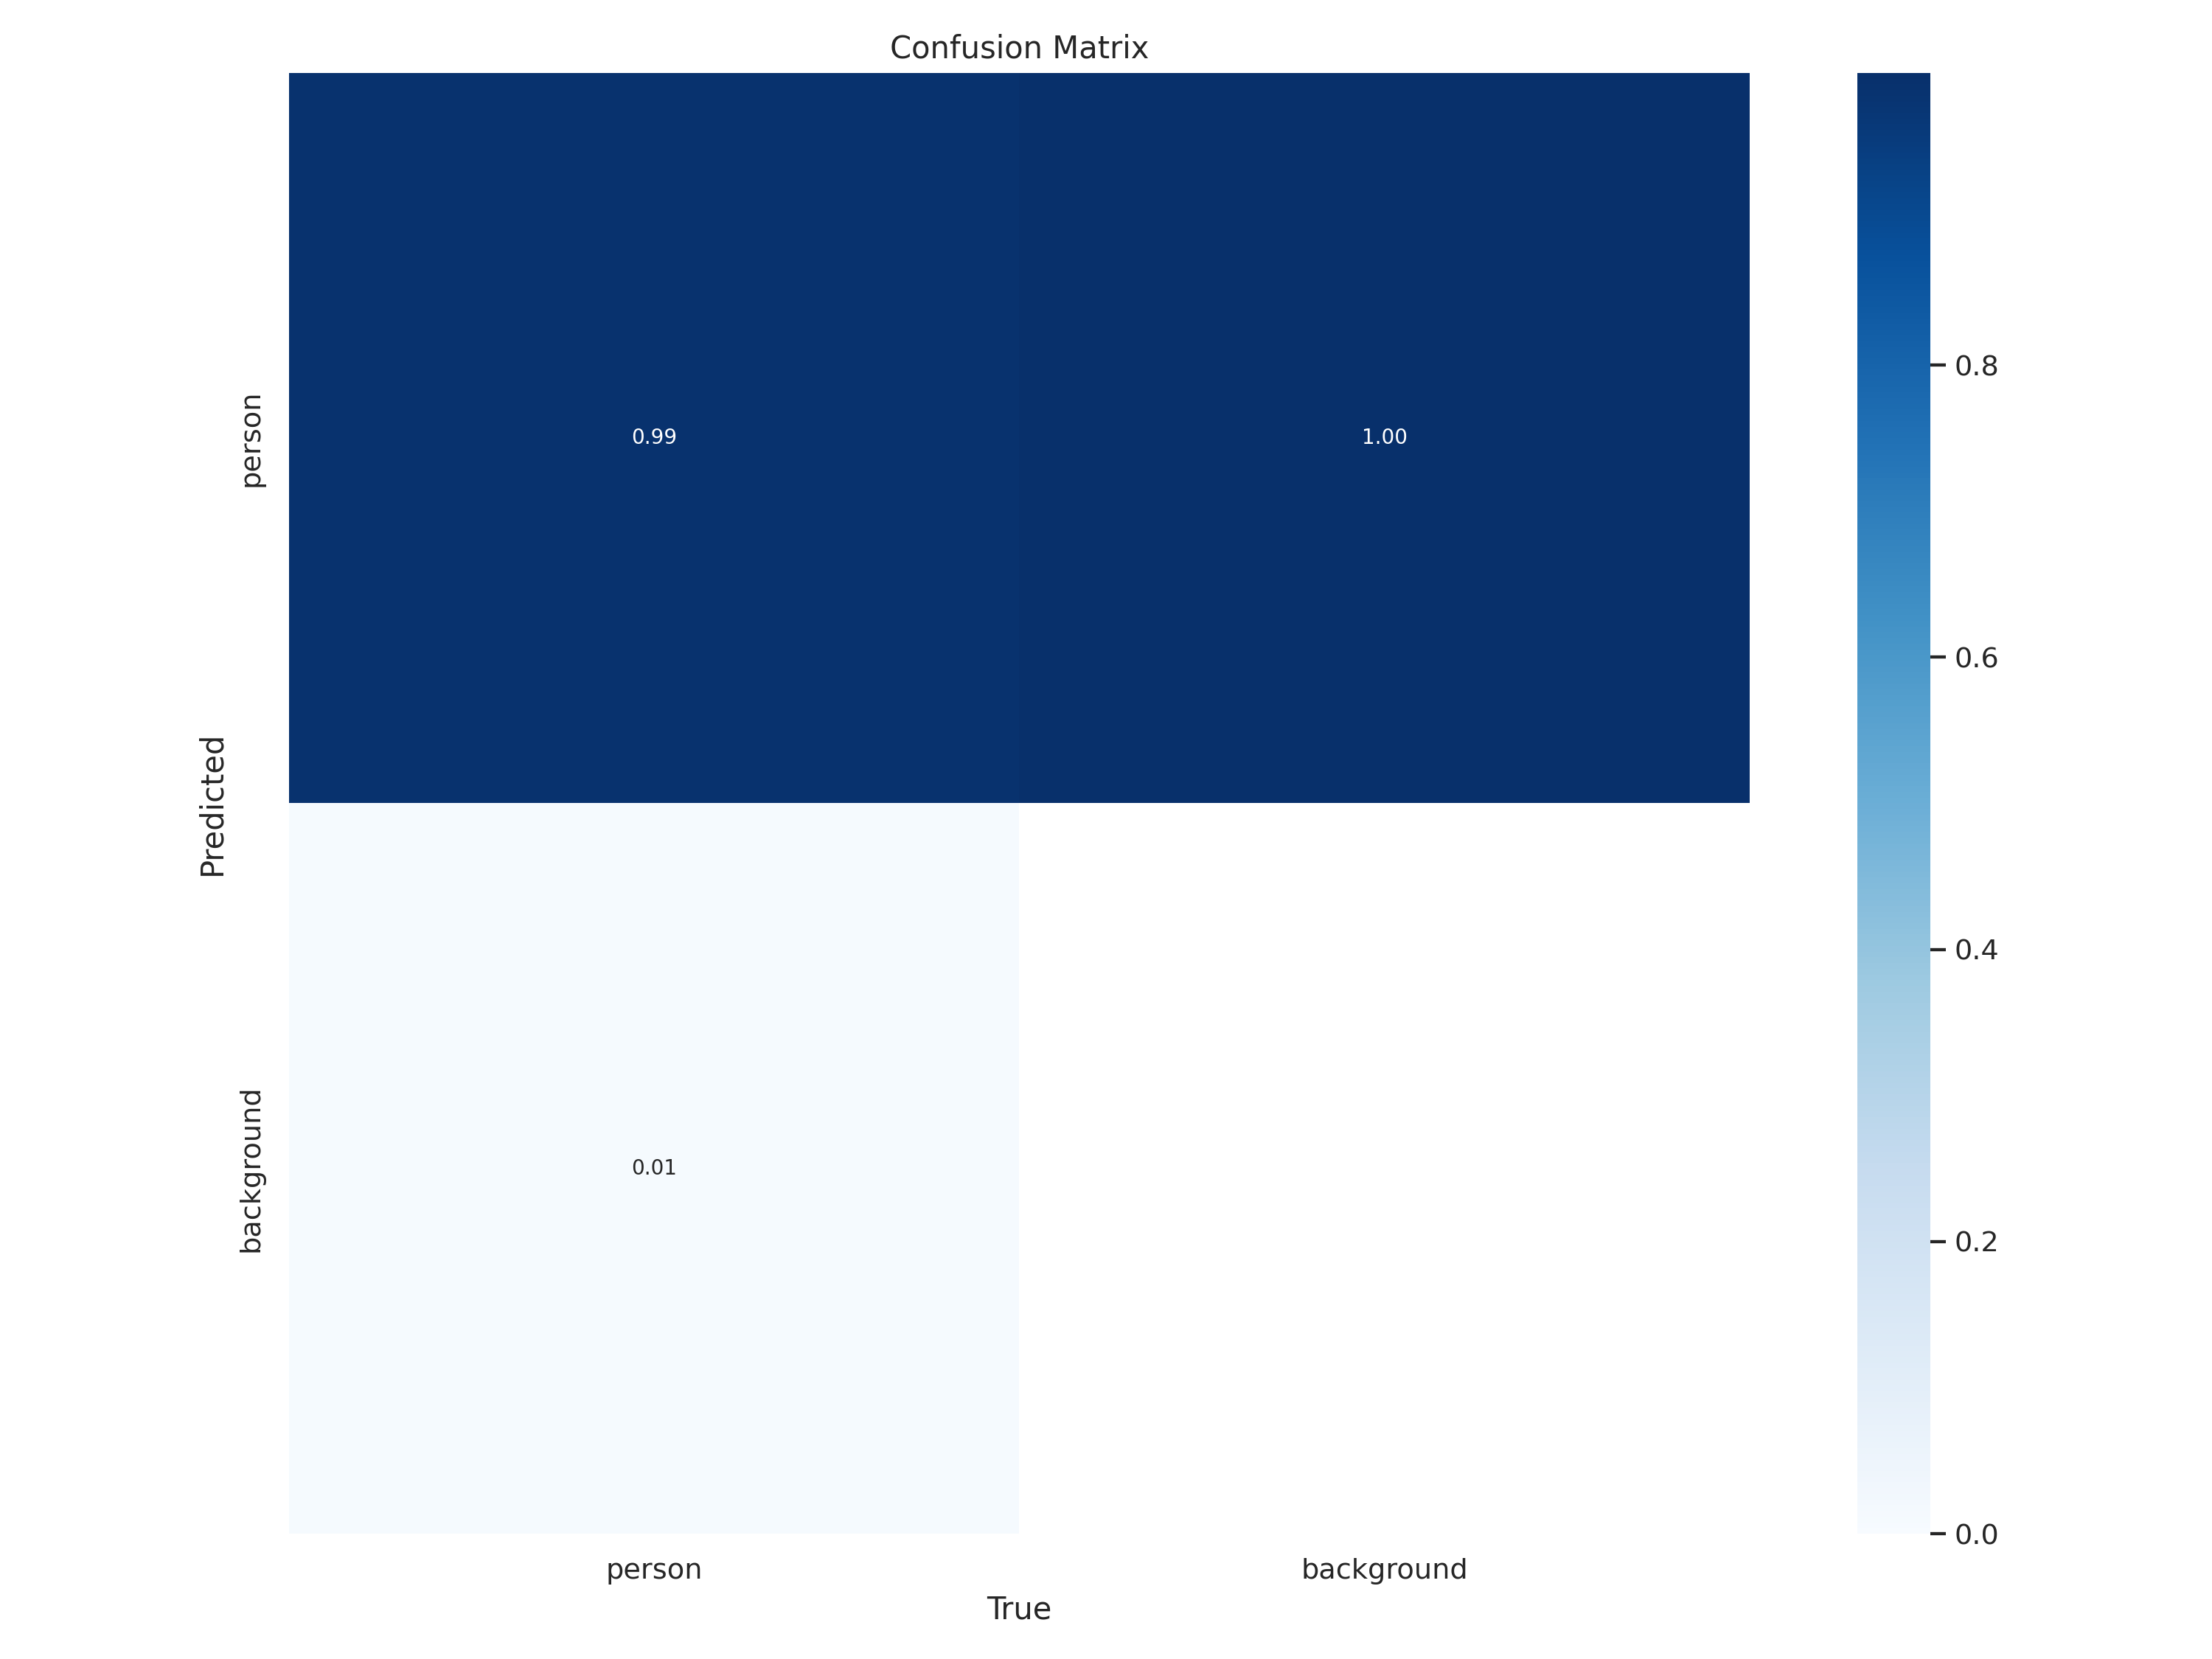

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


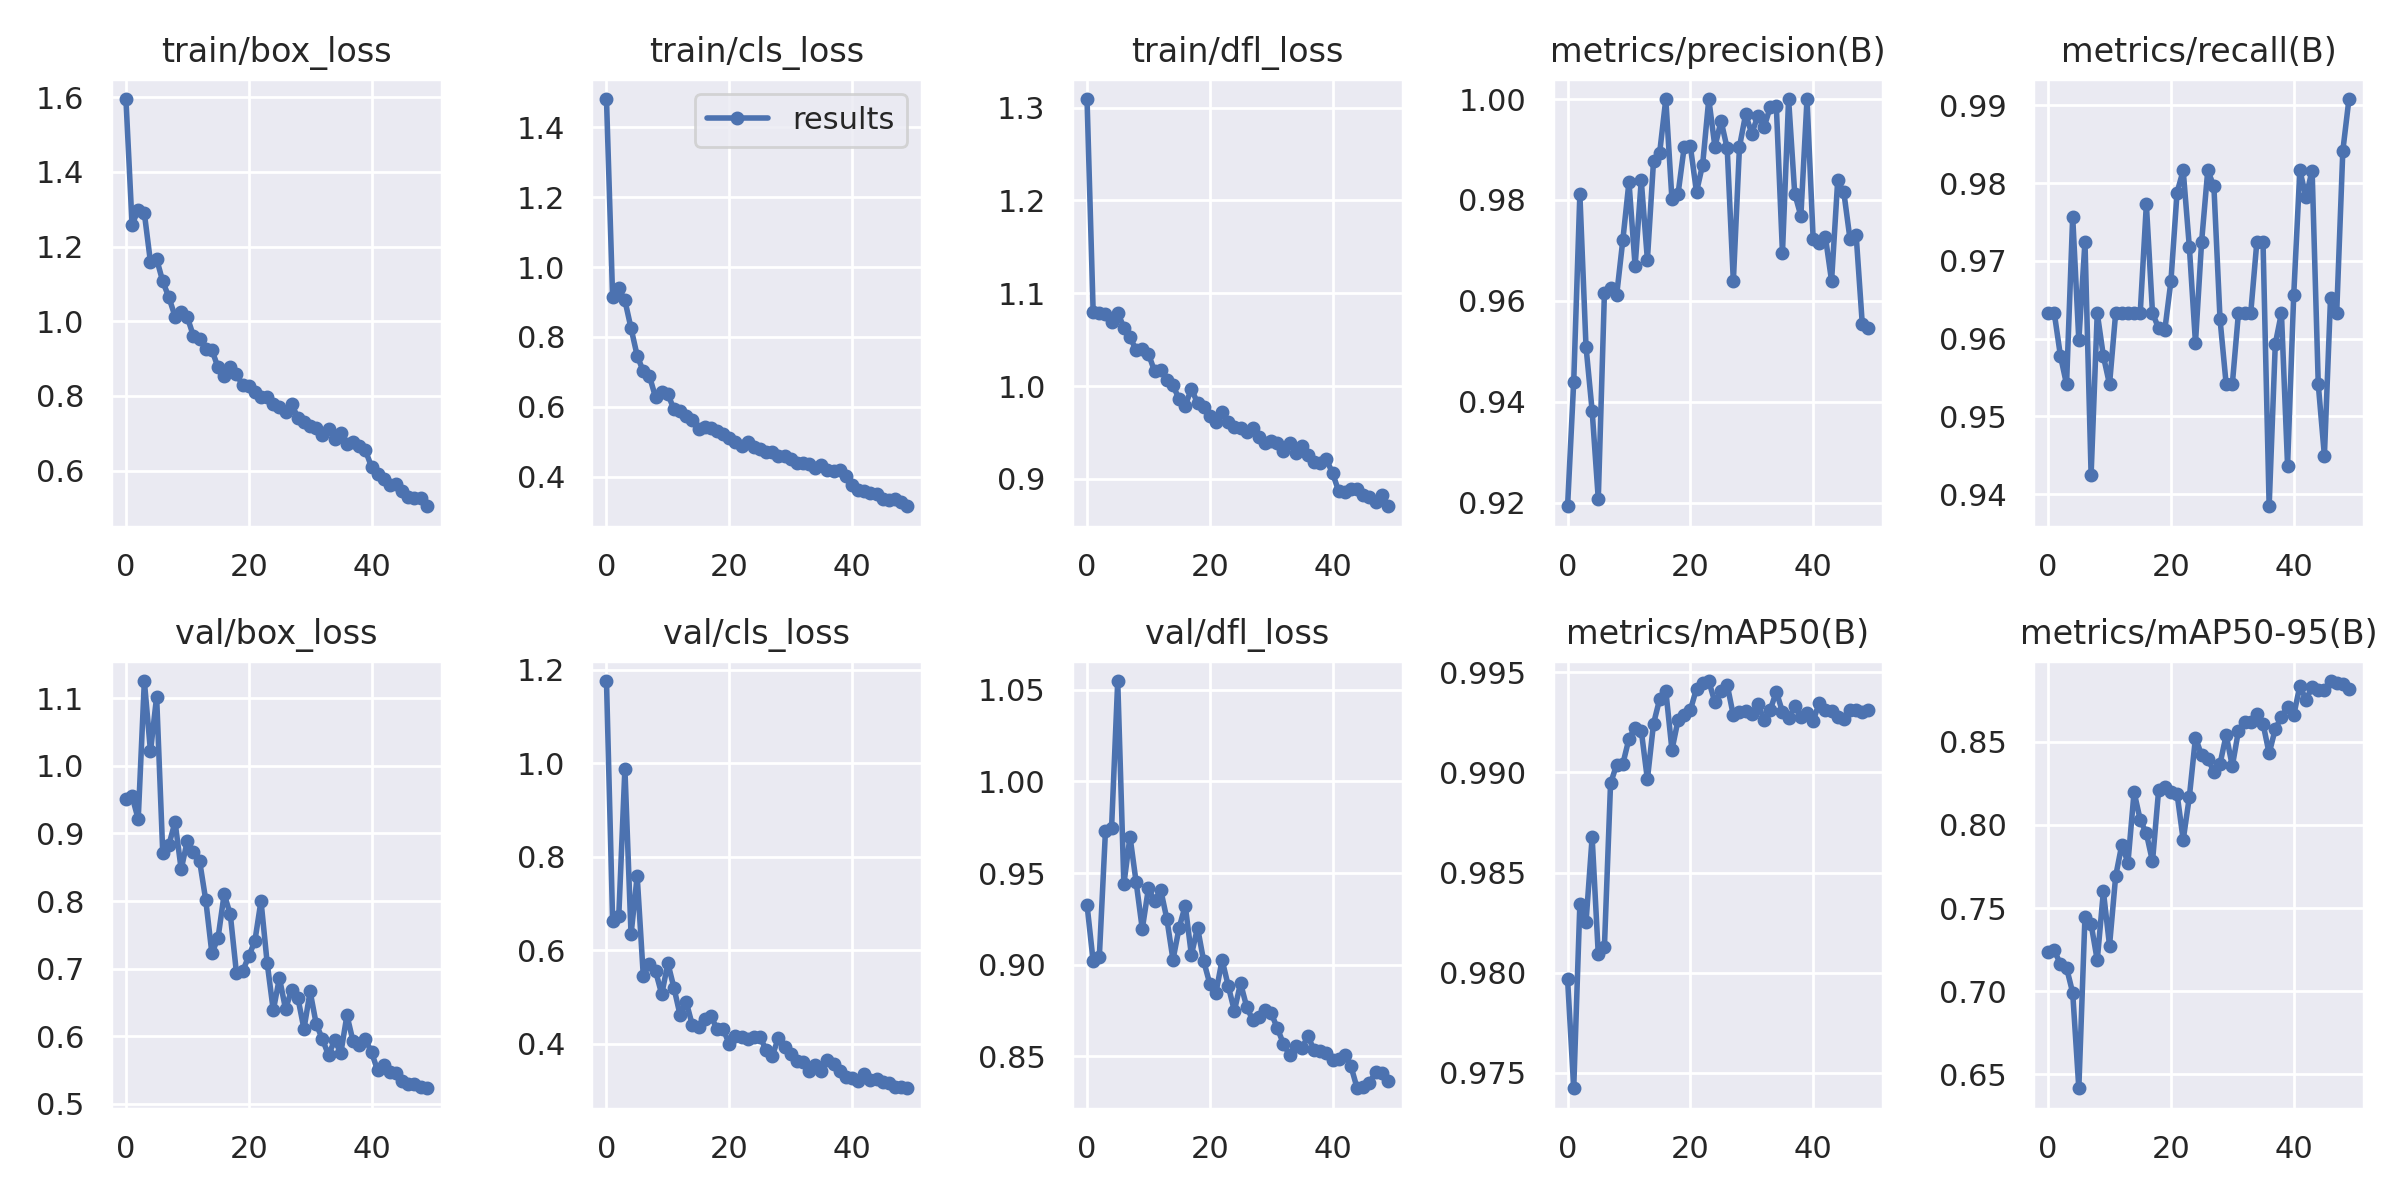

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


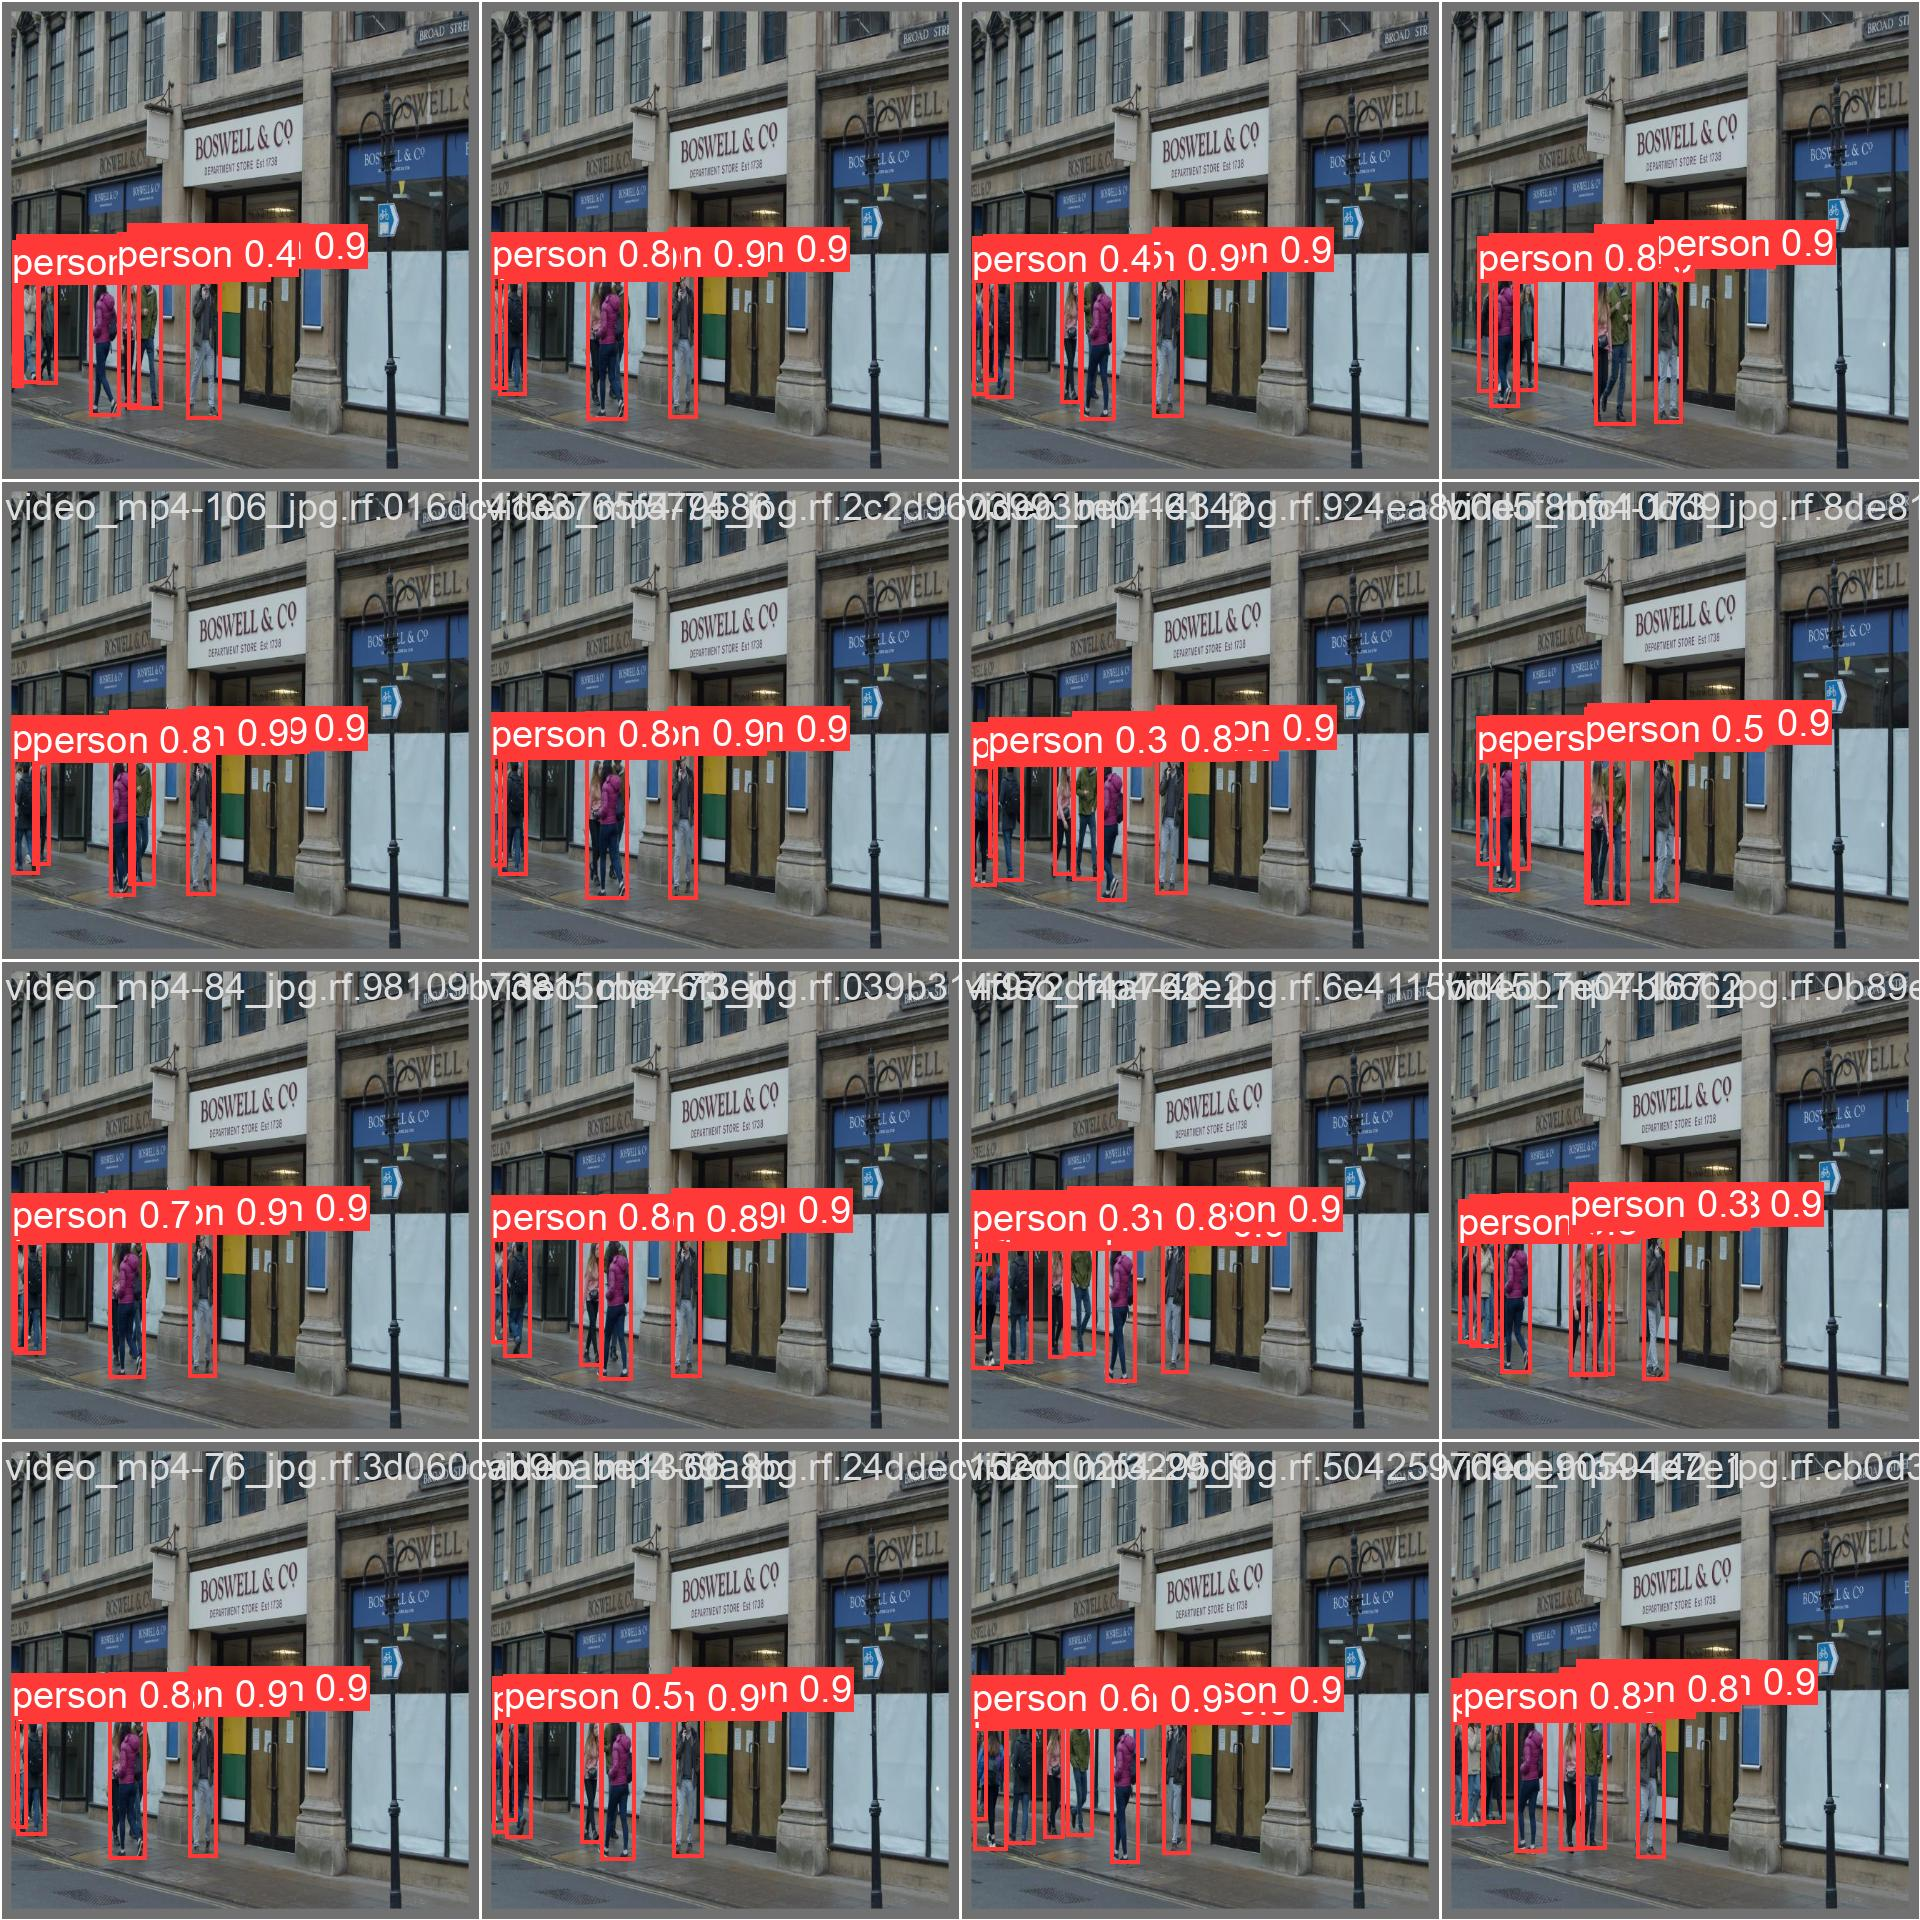

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={location}/data.yaml

/content
2023-10-04 21:55:06.634321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 21:55:07.581717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/person-reidentification-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.22it/s]
                   all         20        109      0.972      0.965      0.993      0.887
Speed: 0.2ms pre-proc

## Inference with Custom Model

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={location}/valid/images save=True

/content
2023-10-04 21:57:07.864218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 21:57:08.810129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/20 /content/datasets/person-reidentification-1/valid/images/video_mp4-106_jpg.rf.016dc4133765f579586f71c2716359cd.jpg: 640x640 6 persons, 23.3ms
image 2/20 /content/datasets/person-reidentification-1/valid/images/video_mp4-114_jpg.rf.ad1cd7a0a4fa8bf212178db49a9e43e3.jpg: 640x640 7 persons, 16.4ms
image 3/20 /content/datasets/person-reidentification-1/valid/images/video

**NOTE:** Let's take a look at few results.

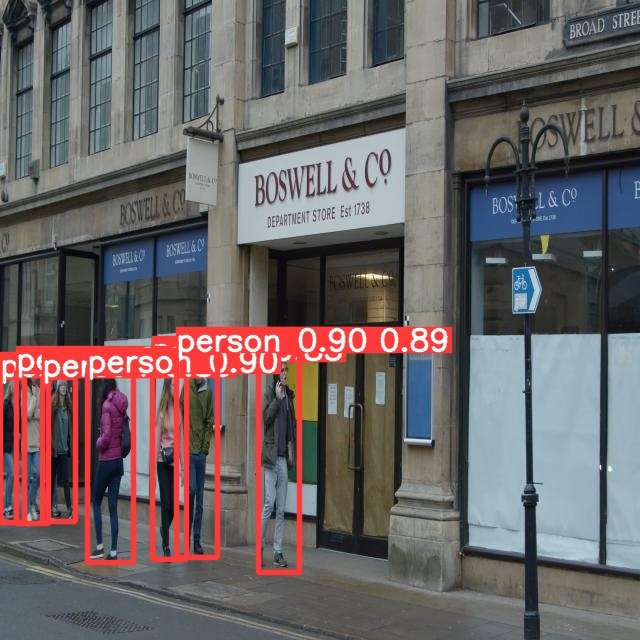

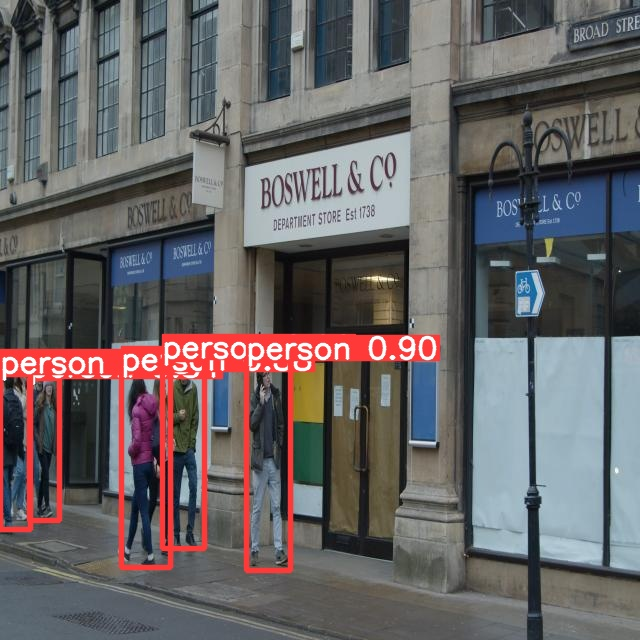

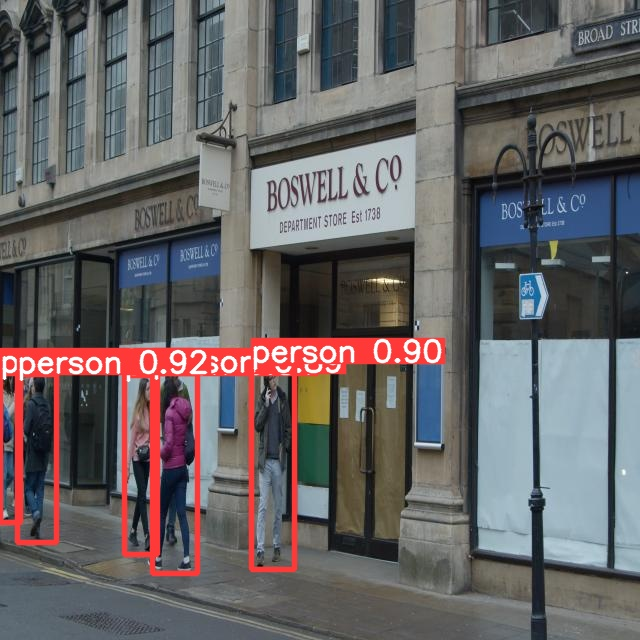

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [20]:
import shutil

# Replace 'my_folder' with the name of the folder you want to download
folder_name = 'runs'

# Replace '/content' with the path of the folder in Colab
colab_folder_path = '/content/' + folder_name

# Create a zip archive of the folder
shutil.make_archive(folder_name, 'zip', colab_folder_path)

print(f'{folder_name} has been zipped.')


# Trigger the download of the ZIP file to your local system
from google.colab import files
files.download(folder_name + '.zip')



runs has been zipped.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
!yolo export model="/content/runs/detect/train/weights/best.pt" format=	onnx

2023-10-04 22:02:48.199723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 22:02:49.093345: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from /content/runs/detect/train/weights/best.pt with output shape (1, 5, 8400) (21.5 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 64.0 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates

In [19]:
!pip install onnx onnx-tf tensorflow

import onnx
import tensorflow as tf
from onnx_tf.backend import prepare

# Load the ONNX model
onnx_model_path = '/content/runs/detect/train/weights/best.onnx'
onnx_model = onnx.load(onnx_model_path)

# Prepare the ONNX model for TensorFlow
tf_rep = prepare(onnx_model)

# Define a TensorFlow session
tf_sess = tf.compat.v1.Session()
tf_rep.export_graph('saved_model_path')  # Replace 'saved_model_path' with your desired path



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 15.0 MB/s eta 0:00:00




TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

INFO:absl:Function `__call__` contains input name(s) x, y with unsupported characters which will be renamed to transpose_193_x, add_44_y in the SavedModel.
INFO:absl:Found untraced functions such as gen_tensor_dict while saving (showing 1 of 1). These functions will not be directly callable after loading.
INFO:absl:Writing fingerprint to saved_model_path/fingerprint.pb
